Шаг 1: Подготовка Colab![D1.jpeg](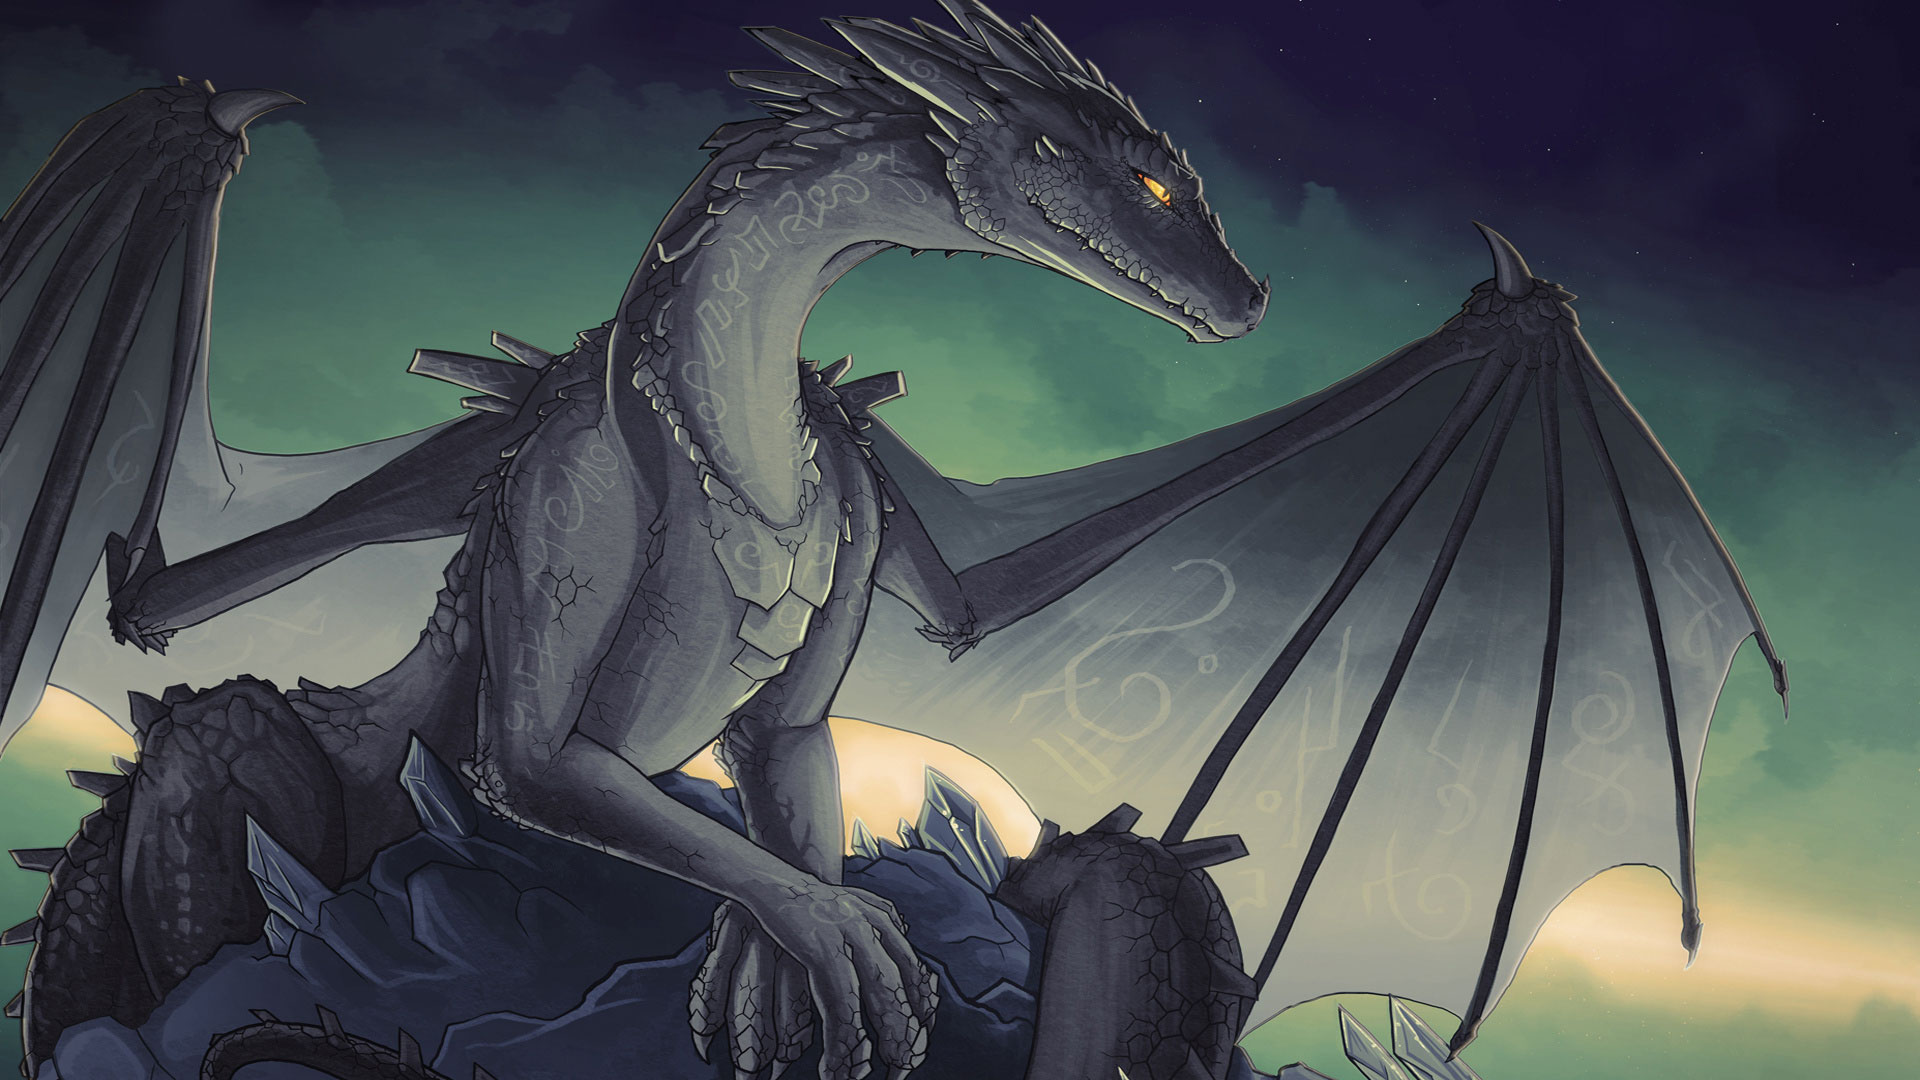![R.jpeg](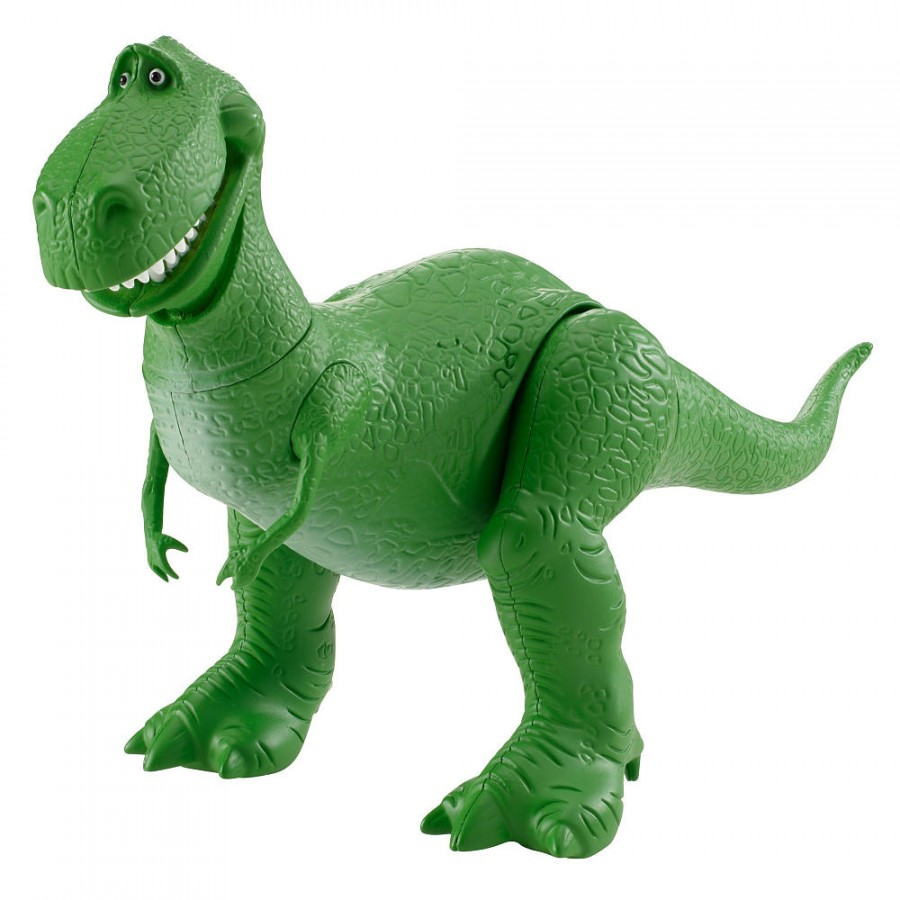![D.jpg](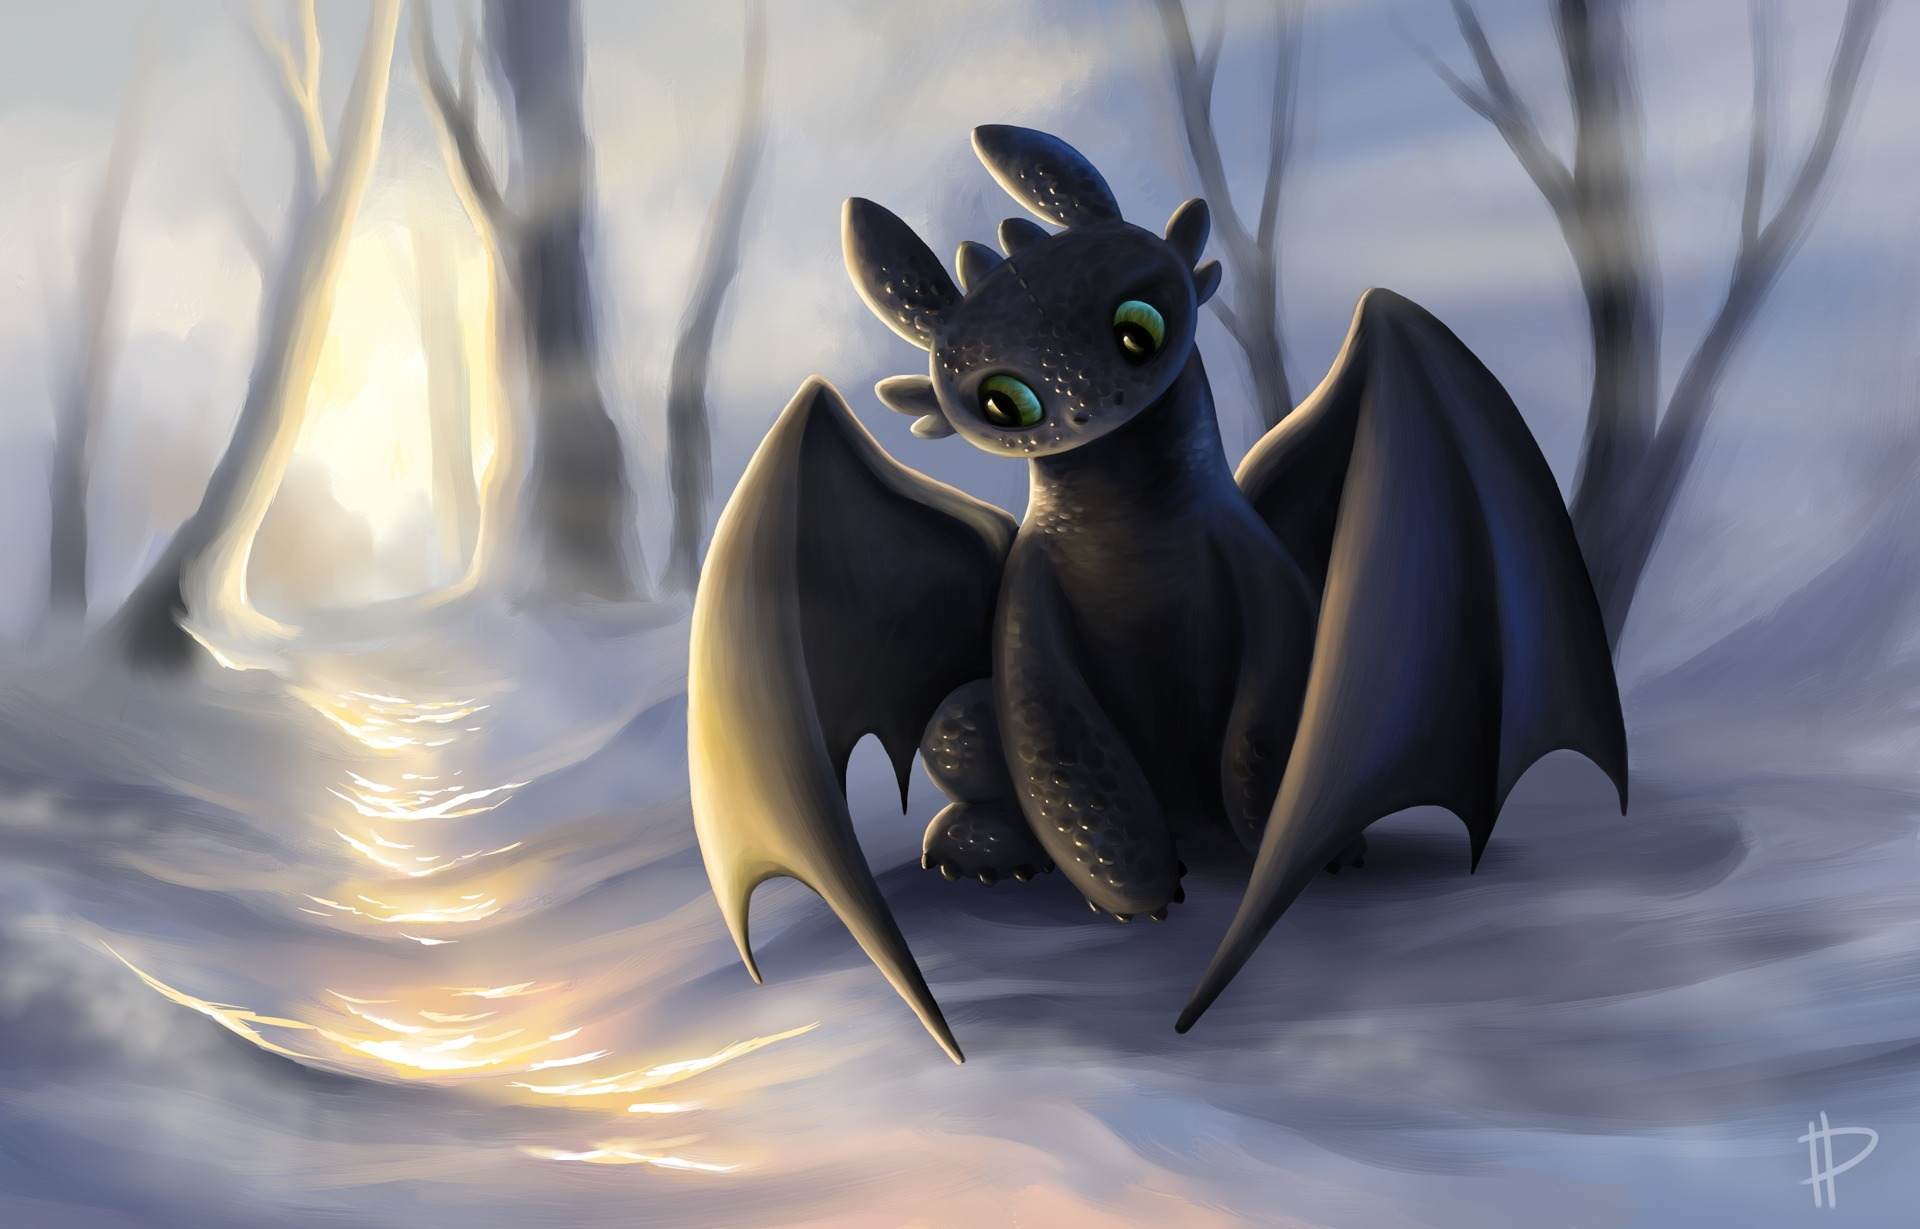![R.jpeg](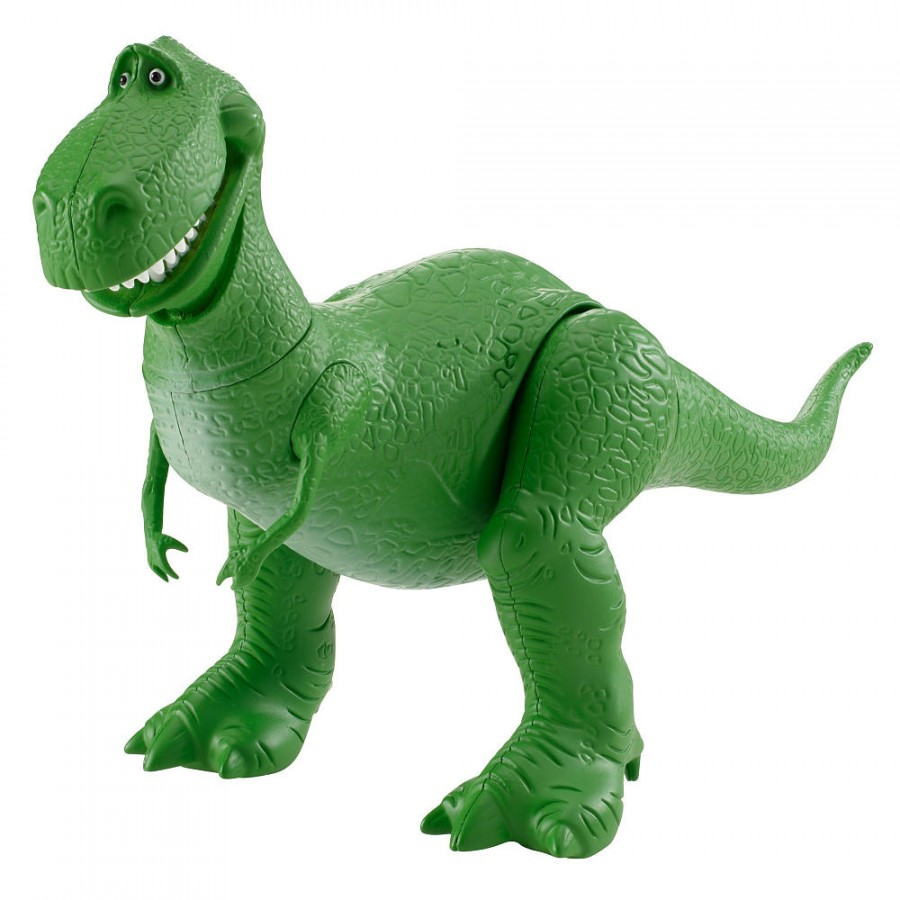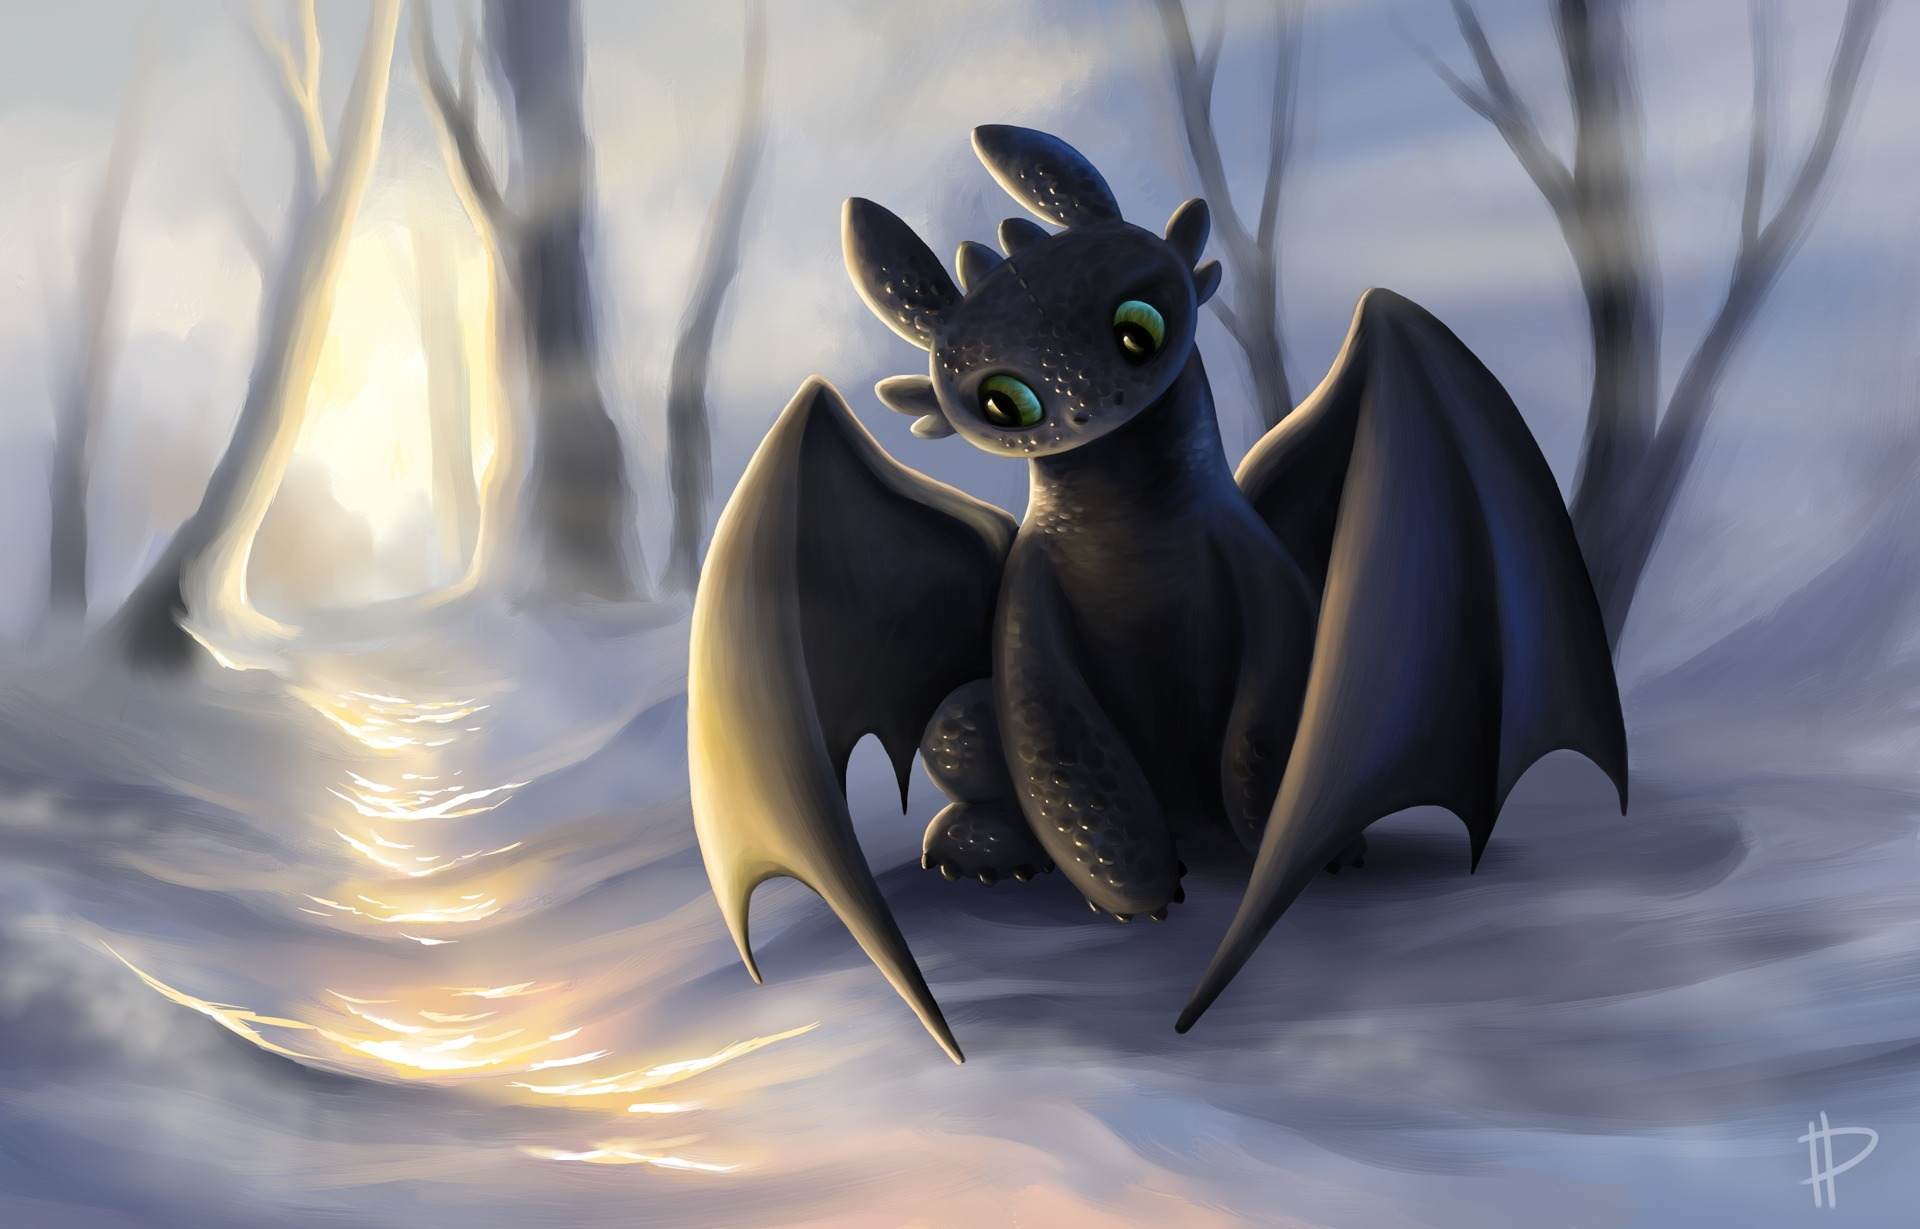))))

In [ ]:
!pip install tensorflow

Шаг 2: Загрузка датасета

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Шаг 3: Импорт библиотек и определение путей

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/drive/MyDrive/dino-dragon/train"
test_dir = "/content/drive/MyDrive/dino-dragon/test"

Шаг 4: Создание модели

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') # Используем sigmoid для бинарной классификации
])

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8), metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 175232)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                11214912  
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

Вопрос 1: Функция потерь - бинарная кросс-энтропия (binary crossentropy)

Вопрос 2: Общее количество параметров в модели можно узнать из вывода model.summary().

Шаг 5: Генераторы данных и обучение

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.
Epoch 1/10
80/80 [==============================] - 47s 581ms/step - loss: 0.1301 - accuracy: 0.9624 - val_loss: 0.2374 - val_accuracy: 0.8934
Epoch 2/10
80/80 [==============================] - 47s 585ms/step - loss: 0.1018 - accuracy: 0.9686 - val_loss: 0.2329 - val_accuracy: 0.8909
Epoch 3/10
80/80 [==============================] - 48s 599ms/step - loss: 0.0780 - accuracy: 0.9812 - val_loss: 0.2582 - val_accuracy: 0.8934
Epoch 4/10
80/80 [==============================] - 47s 592ms/step - loss: 0.0570 - accuracy: 0.9875 - val_loss: 0.2604 - val_accuracy: 0.9010
Epoch 5/10
80/80 [==============================] - 49s 605ms/step - loss: 0.0484 - accuracy: 0.9937 - val_loss: 0.2523 - val_accuracy: 0.8858
Epoch 6/10
80/80 [==============================] - 47s 584ms/step - loss: 0.0411 - accuracy: 0.9937 - val_loss: 0.2553 - val_accuracy: 0.8832
Epoch 7/10
80/80 [==============================] - 47s 589

Вопрос 3: Медиана точности обучения по всем эпохам можно узнать из history.history['accuracy'].

Вопрос 4: Стандартное отклонение потерь в процессе обучения можно узнать из history.history['loss'].

Шаг 6: Аугментация данных

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # Убедитесь, что путь указан верно
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

history_aug = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Found 1594 images belonging to 2 classes.
Epoch 1/10
80/80 [==============================] - 56s 693ms/step - loss: 0.2955 - accuracy: 0.8827 - val_loss: 0.6012 - val_accuracy: 0.7970
Epoch 2/10
80/80 [==============================] - 55s 686ms/step - loss: 0.2786 - accuracy: 0.8871 - val_loss: 0.4354 - val_accuracy: 0.8401
Epoch 3/10
80/80 [==============================] - 54s 667ms/step - loss: 0.2800 - accuracy: 0.8852 - val_loss: 0.2769 - val_accuracy: 0.8909
Epoch 4/10
80/80 [==============================] - 56s 695ms/step - loss: 0.2892 - accuracy: 0.8808 - val_loss: 0.3482 - val_accuracy: 0.8553
Epoch 5/10
80/80 [==============================] - 58s 720ms/step - loss: 0.2788 - accuracy: 0.8915 - val_loss: 0.2529 - val_accuracy: 0.8909
Epoch 6/10
80/80 [==============================] - 55s 681ms/step - loss: 0.2871 - accuracy: 0.8864 - val_loss: 0.4494 - val_accuracy: 0.8071
Epoch 7/10
80/80 [==============================] - 56s 693ms/step - loss: 0.2683 - accuracy: 0.8990

Вопрос 5: Среднее значение потерь на тестовом наборе данных после аугментации можно узнать из history_aug.history['val_loss'].

Вопрос 6: Среднее значение точности на тестовом наборе данных за последние 5 эпох можно узнать из history_aug.history['val_accuracy'] с отбором нужных эпох.

И сохроняем всё

In [35]:
model.save('path_to_save_model')


ТЕСТИМ

In [ ]:
from PIL import Image

def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Нормализация
    return img_array

ШАГ2

In [ ]:
# Замените на ваш путь к изображению
image_path = "/content/drive/MyDrive/test_photos/D1.jpeg"

# Предобработка изображения
img_array = preprocess_image(image_path)

ШАГ3

In [ ]:
# Получение предсказания от модели
prediction = model.predict(tf.expand_dims(img_array, axis=0))

# Интерпретация результата
if prediction[0][0] > 0.5:
    print("Дракон")
else:
    print("Динозавр")

1/1 [==============================] - 0s 35ms/step
Дракон


ЕЩЕ Тест для других ползователей

Saving R.jpeg to R (1).jpeg


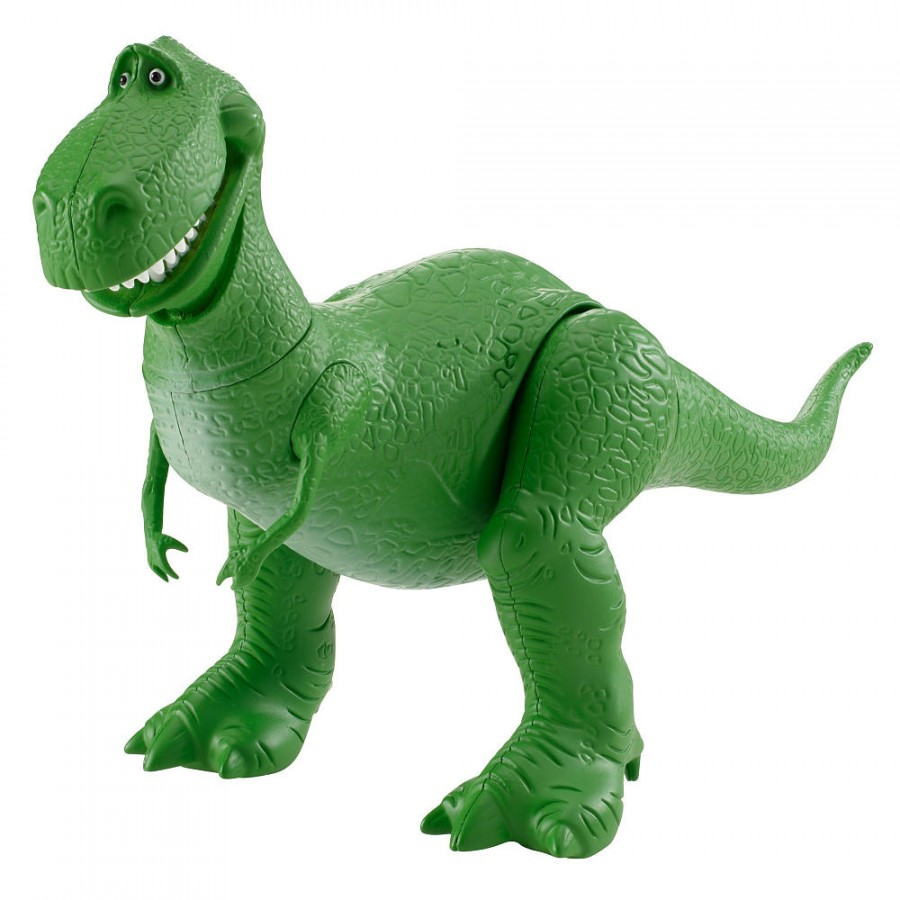

1/1 [==============================] - 0s 44ms/step
Динозаврик


In [43]:
from PIL import Image
import tensorflow as tf
from google.colab import files
from IPython.display import Image as DisplayImage

def preprocess_image(img):
    img = img.resize((150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    return img_array

uploaded_file = files.upload()
image_name = list(uploaded_file.keys())[0]
img = Image.open(image_name)
display(DisplayImage(image_name))

img_array = preprocess_image(img)
prediction = model.predict(tf.expand_dims(img_array, axis=0))

if prediction[0][0] > 0.5:
    print("Дракончик")
else:
    print("Динозаврик")